<a href="https://colab.research.google.com/github/Isyaanggita/Tokyo-Olympic-EDA/blob/main/Tokyo_Olympic_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from google.colab import  drive

In [2]:
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Tokyo Olympic Datasets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Athletes.xlsx  Coaches.xlsx  EntriesGender.xlsx  Medals.xlsx  Teams.xlsx


In [3]:
athlete = pd.read_excel('/content/drive/MyDrive/Tokyo Olympic Datasets/Athletes.xlsx')
gender = pd.read_excel('/content/drive/MyDrive/Tokyo Olympic Datasets/EntriesGender.xlsx')
coach = pd.read_excel('/content/drive/MyDrive/Tokyo Olympic Datasets/Coaches.xlsx')
medal = pd.read_excel('/content/drive/MyDrive/Tokyo Olympic Datasets/Medals.xlsx')
team = pd.read_excel('/content/drive/MyDrive/Tokyo Olympic Datasets/Teams.xlsx')

# **Medal Analysis**

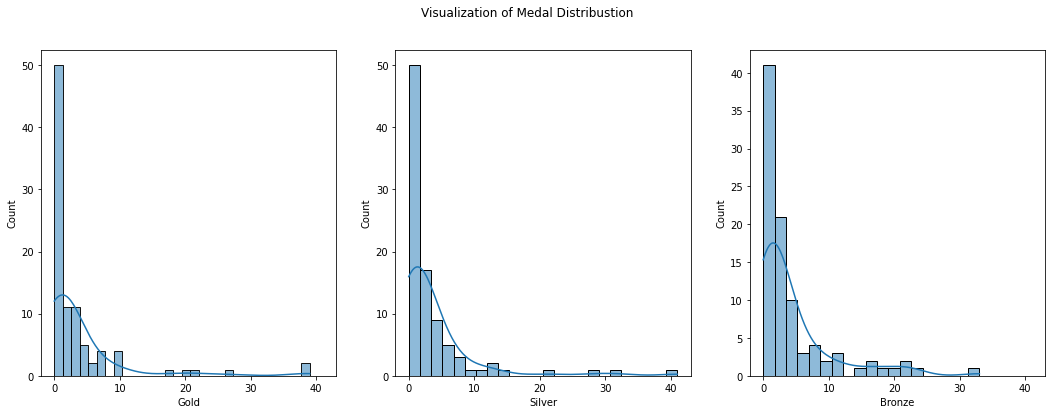

In [4]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Visualization of Medal Distribustion')
sns.histplot(medal['Gold'] , kde=True,ax=axes[0])
sns.histplot(medal['Silver'] , kde=True,ax=axes[1])
sns.histplot(medal['Bronze'] , kde=True,ax=axes[2])

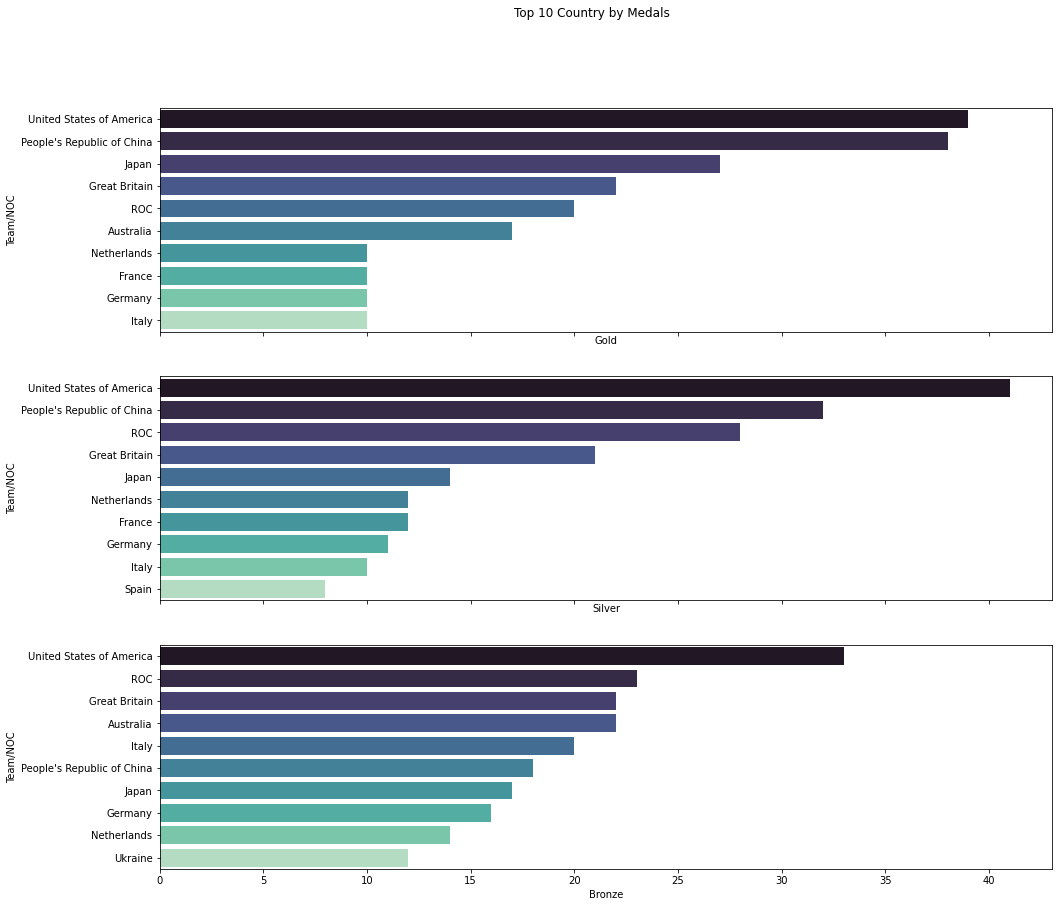

In [5]:
figure, axes = plt.subplots(3, 1, sharex=True, figsize=(16,14))
figure.suptitle('Top 10 Country by Medals')
sns.barplot(y='Team/NOC', 
            x='Gold', 
            data=medal.sort_values('Gold',ascending = False)[:10],
            palette='mako',
            ax=axes[0]
           )
sns.barplot(y='Team/NOC', 
            x='Silver', 
            data=medal.sort_values('Silver',ascending = False)[:10],
            palette='mako',
            ax=axes[1]
           )
sns.barplot(y='Team/NOC', 
            x='Bronze', 
            data=medal.sort_values('Bronze',ascending = False)[:10],
            palette='mako',
            ax=axes[2]
           )

# **Gender Analysis**

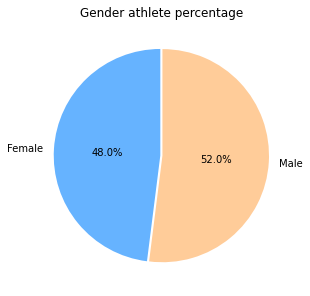

In [6]:
colors = ['#66b3ff','#ffcc99']
labels = ['Female', 'Male']
values = [gender['Female'].sum(), gender['Male'].sum()]
explode = (0.01,0.01)
 
plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.5, explode = explode)
# centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Gender athlete percentage")
plt.show()

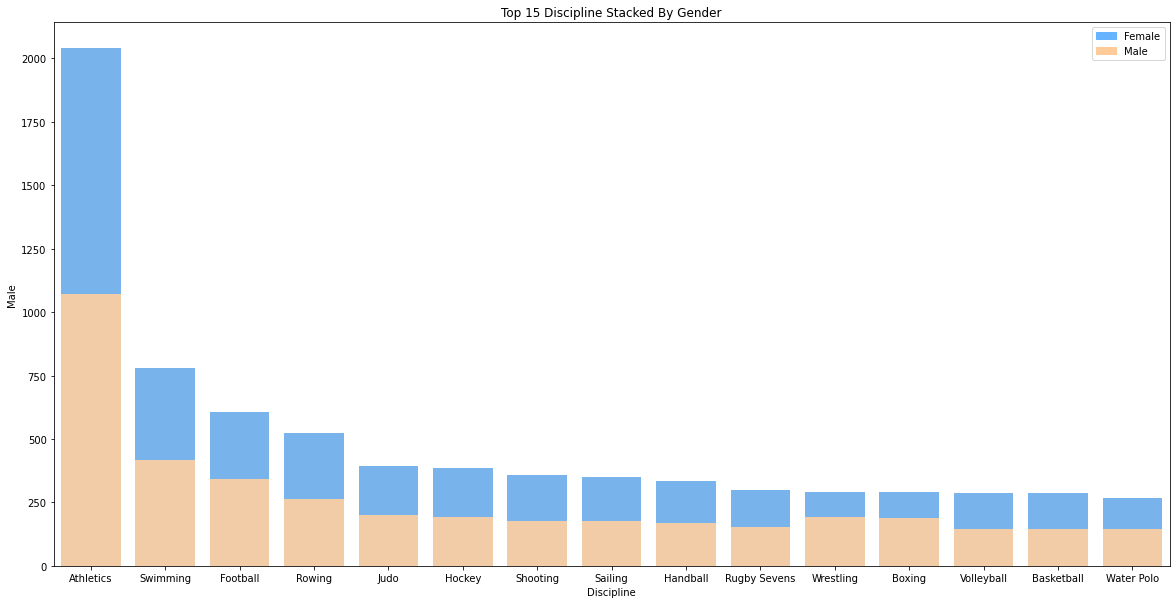

In [7]:
import matplotlib.patches as mpatches

# set the figure size
plt.figure(figsize=(20, 10))
plt.title('Top 15 Discipline Stacked By Gender')

# bar chart 1 -> top bars (group of 'smoker=No')
total = gender[['Discipline', 'Total']].sort_values(by='Total', ascending=False)[:15]
bar1 = sns.barplot(x="Discipline",  y="Total", data=total, color='#66b3ff')

# bottom bar ->  take only smoker=Yes values from the data
male = gender[['Discipline', 'Male', 'Total']].sort_values(by='Total', ascending=False)[:15]
bar2 = sns.barplot(x="Discipline",  y="Male", data=male, color='#ffcc99')

# add legend
top_bar = mpatches.Patch(color='#66b3ff', label='Female')
bottom_bar = mpatches.Patch(color='#ffcc99', label='Male')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

# **Team Analysis**

In [8]:
team.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


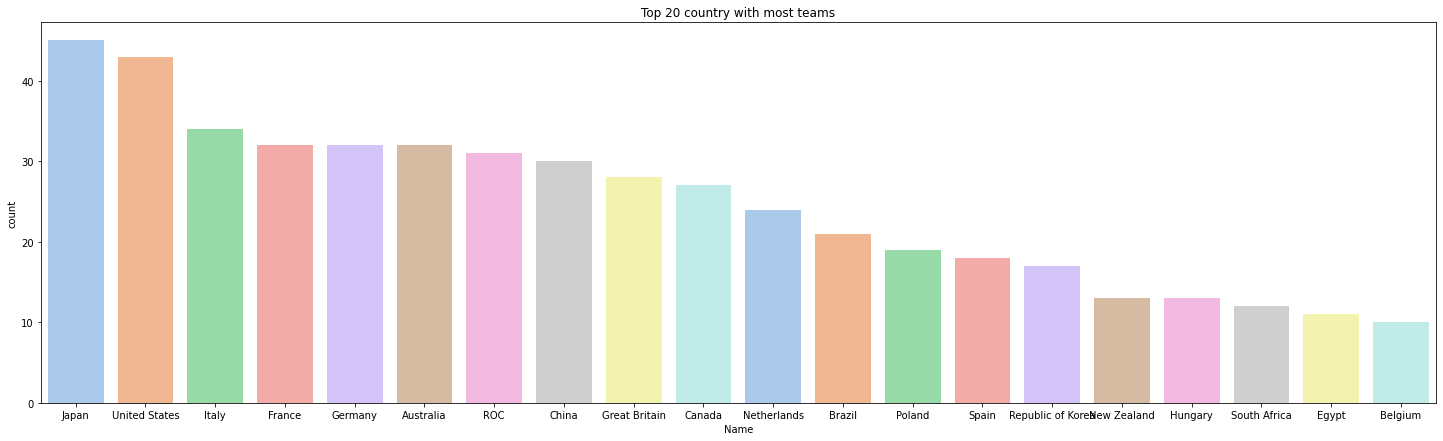

In [9]:
plt.figure(figsize=(25,7))
plt.title('Top 20 country with most teams')
sns.countplot(x='Name', data=team, palette='pastel', order=team['Name'].value_counts().iloc[:20].index);

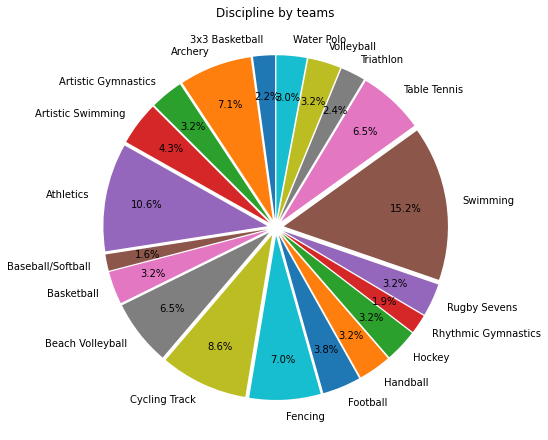

In [10]:
teams = team.groupby(['Discipline']).count()
teams.reset_index(inplace=True)
labels = teams['Discipline']
values = teams['Name']
explodes = []

for i in range(20):
    explodes.append(0.05)

plt.figure(figsize=(20,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.75, explode = explodes)
fig = plt.gcf()
plt.tight_layout()
plt.title("Discipline by teams")
plt.show()

# **Athlete Analysis**



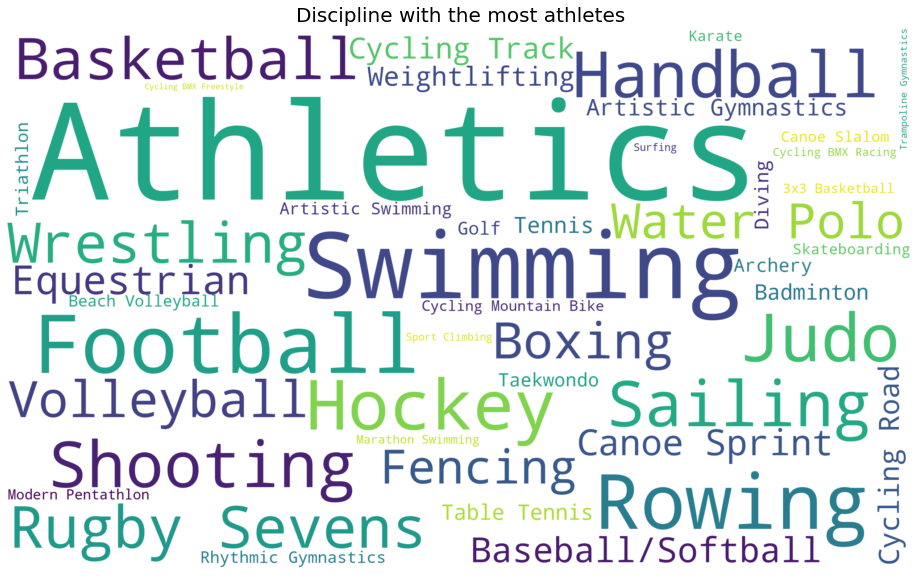

In [11]:
discipline_athlete = athlete['Discipline'].value_counts()

wordcloud = WordCloud(
              width=2500,
              height=1500, 
              scale=1,
              normalize_plurals=False,
              repeat=False,
              random_state=42,
              background_color='white'
            )

wordcloud.generate_from_frequencies(frequencies = discipline_athlete)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Discipline with the most athletes', fontsize = 20)
plt.show()

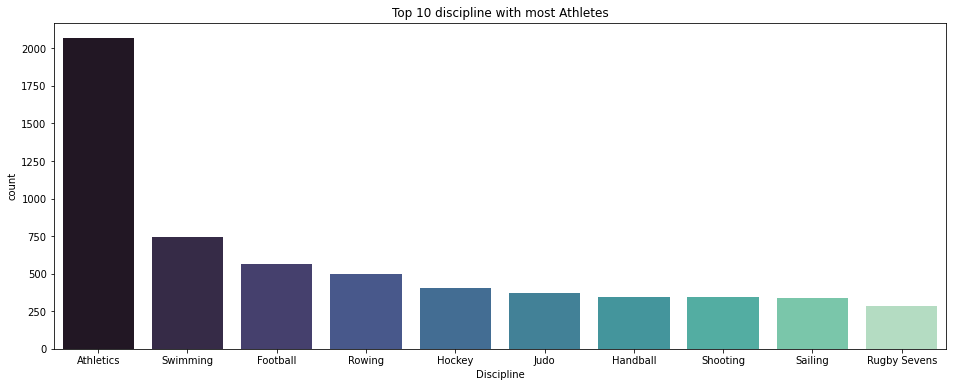

In [12]:
plt.figure(figsize=(16,6))
plt.title('Top 10 discipline with most Athletes')
sns.countplot(x='Discipline',
              data=athlete,
              palette='mako', 
              order=athlete['Discipline'].value_counts().iloc[:10].index)

# **Coach Analysis**

In [13]:
coach

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
...,...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN


In [14]:
# number_coach = coach[['NOC','Discipline']].groupby('NOC').count()
number_coach = coach[['NOC']].value_counts().rename_axis('Team/NOC').reset_index(name='counts')
# number_coach.sort_values(by = 'Team/NOC')

In [15]:
medal

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [16]:
medal_and_coach = medal.merge(number_coach, how='left', on='Team/NOC')
medal_and_coach

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,counts
0,1,United States of America,39,41,33,113,1,28.0
1,2,People's Republic of China,38,32,18,88,2,12.0
2,3,Japan,27,14,17,58,5,35.0
3,4,Great Britain,22,21,22,65,4,7.0
4,5,ROC,20,28,23,71,3,12.0
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,NaN
89,86,Grenada,0,0,1,1,77,NaN
90,86,Kuwait,0,0,1,1,77,NaN
91,86,Republic of Moldova,0,0,1,1,77,NaN
